# kNN-CF Recommender Engine
### This notebook contians the recommender engine using the KNN Collaborative Filtering model.

### Preprocessing and preliminary code:

Libraries used in preprocessing and data manipulation:

In [154]:
import numpy as np 
import pandas as pd

# Libraries for Recommendation System
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [155]:
#To set up the engine we will start with the Movielens 100k
movie_100k = pd.read_csv('data\movielens_100k\movies.csv')
rating_100k = pd.read_csv('data\\movielens_100k\\ratings.csv')
print("Original data columns:")
print(movie_100k.columns)
print(rating_100k.columns)

#We create new dataframes only using the columns that are necessary
movies = movie_100k.loc[:,["movieId","title"]]
ratings = rating_100k.loc[:,["userId","movieId","rating"]]

print("\n\n\nTruncated dataframes;")
print(movies.columns)
print(ratings.columns)

#This command creates a dataframe which merges both ratings and movies based on a common column (movieId)
data_100k = pd.merge(movies,ratings)

Original data columns:
Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')



Truncated dataframes;
Index(['movieId', 'title'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Dominic\AppData\Local\Temp\ipykernel_16324\1108140883.py:2: SyntaxWarning: invalid escape sequence '\m'
  movie_100k = pd.read_csv('data\movielens_100k\movies.csv')


In [156]:
#This method performs all preprocessing that is required for the data before using the KNN algorithm
#It takes in a dataset in the form of a dataframe, a index_column_name for specifying by which column in the dataframe we filter by value counts, and a threshold which determines the point at which 
#we stop considering the data in the indexed column by how many times they appear in the dataset.
def preprocess(data, index_column_name, threshold):
    
    #filtering out instances which do not appear more than the threshold in the dataframe
    index_counts = data_100k[index_column_name].value_counts().sort_values(ascending=False)
    filtered_counts = index_counts[index_counts >= threshold]
    pre_processed_data = data_100k[data_100k[index_column_name].isin(filtered_counts.index)]
    
    
    
    return pre_processed_data


We will now try to create a matrix which maps all user ratings to all movies (for each movie (row) we will have each user (column) and their ratings)

In [157]:
data_100k_filtered = preprocess(data_100k, 'movieId', 50)
print("Data shape before preprocessing:")
print(data_100k.shape)
print("Data shape after preprocessing:")
print(data_100k_filtered.shape)
print("\n")


user_movie_table = data_100k_filtered.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)

print("Pivot table visualization:")    
user_movie_table.head(10)

Data shape before preprocessing:
(100836, 4)
Data shape after preprocessing:
(41360, 4)


Pivot table visualization:


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
11,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.5,3.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,4.5,0.0,4.5
17,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0


## Sonya preprocessing


In [158]:
# Preprocessing
threshold = 10 # threshold for both movies and usres

# Read the data from csv
df_rating = pd.read_csv('data\\movielens_100k\\ratings.csv')

# Get only some data not to explode
df_rating_small = df_rating#.head(10000)

# Calculate the number of ratings per movie
movie_num_user_rated_counts = df_rating_small['movieId'].value_counts()

# Create a list of movie IDs with 10 or more ratings
popular_movies = movie_num_user_rated_counts[movie_num_user_rated_counts >= threshold].index.tolist()

# Filter the DataFrame to keep only the rows with movies that meet the threshold
#filtered_df = df_rating_small[df_rating_small['movieId'].isin(popular_movies)]

#### NEW PART ####
# Calculate the number of rated movies per person
num_ratings_per_user = df_rating_small['userId'].value_counts()

# Create a list of users who rated at least 10 movies
active_users = num_ratings_per_user[num_ratings_per_user >= threshold].index.tolist()

# Filter the DataFrame to keep only the rows with number of user ratings meeting the threshold
filtered_df = df_rating_small[(df_rating_small['userId'].isin(num_ratings_per_user)) & (df_rating_small['movieId'].isin(popular_movies))]
#### END ####

# Train test split 
# Remove one rated movie per user and put it into the test set 

train_data = filtered_df.copy()
test_data = pd.DataFrame()

for user_id in train_data['userId'].unique():
    user_ratings = train_data[train_data['userId'] == user_id]
    
    if len(user_ratings) > 1:
        test_rating = user_ratings.sample()
        test_data = pd.concat([test_data, test_rating])
        train_data.drop(test_rating.index, inplace=True)
        
print("Train data size: ", train_data.shape[0])
print("Test data size: ", test_data.shape[0])


def create_pivot_table_rafael(data):
    #data = pd.merge(movies_df,ratings_df)
    return data.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)

user_movie_table_sonya = create_pivot_table_rafael(train_data)
print(user_movie_table_sonya)

Train data size:  27866
Test data size:  231
userId   20   21   22   23   24   25   26   27   28   29   ...  507  517  518  \
movieId                                                    ...                  
1        0.0  3.5  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  ...  0.0  4.0  0.0   
2        3.0  3.5  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  3.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6        0.0  0.0  0.0  4.0  4.5  0.0  0.0  0.0  3.5  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
174055   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
176371   0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
177765   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
179819   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  

For the code above I will provide chatGPTs explanation of the methods bc I couldn't explain it better and i dont care to at the moment:

*Here, the pivot_table function is used to reshape the data dataframe. Let's understand the parameters:*

- *index=["title"]: This sets the "title" column as the index of the pivot table. Each unique movie title will become a row in the pivot table.*
- *columns=["userId"]: This sets the "userId" column as the columns of the pivot table. Each unique user ID will become a column in the pivot table.*
- *values="rating": This specifies that the values to be filled in the pivot table come from the "rating" column of the data dataframe.*
- *fillna(0): This fills any missing (NaN) values in the pivot table with 0.*

*As a result, user_movie_table becomes a matrix where rows represent movies, columns represent users, and the cells contain ratings given by users to movies. Any missing ratings are filled with 0, indicating no rating was given.*

### KNN Engine implemented 


Below I use our previous matrix to implement a basic KNN Recommender using the Sklearn NearestNeighbors library implementation. To show an example of the implementation I pick a random user and print the 5 nearest 

In [159]:

query_index = np.random.choice(user_movie_table.shape[0])

k_value = 6

user_movie_table_matrix = csr_matrix(user_movie_table.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_movie_table_matrix)
distances, indices = model_knn.kneighbors(user_movie_table.iloc[query_index,:].values.reshape(1,-1), n_neighbors = k_value+1)
indices = indices[0][1:]


print("Random movie: \"" + str(user_movie_table.index[query_index]) + "\"'s closest " + str(k_value) + " neighbors are:")
j = 0
for i, index in enumerate(indices):
    print("\tRecommendation " + str(i + 1) + "\tMovie: " + str(user_movie_table.index[index]) + ", Distance: " + str(distances[0][i]))

Random movie: "2"'s closest 6 neighbors are:
	Recommendation 1	Movie: 364, Distance: 0.0
	Recommendation 2	Movie: 500, Distance: 0.4115622741415874
	Recommendation 3	Movie: 367, Distance: 0.4501818938444998
	Recommendation 4	Movie: 480, Distance: 0.45501892320213067
	Recommendation 5	Movie: 586, Distance: 0.46195443302270334
	Recommendation 6	Movie: 551, Distance: 0.475123579391069


## Visualizations

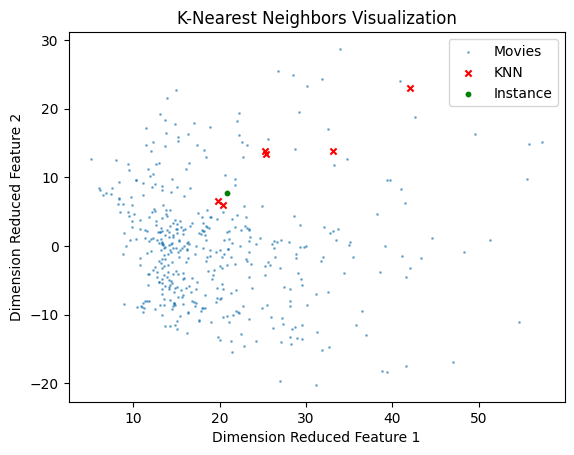

In [160]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Assuming user_movie_table_matrix is your sparse user-movie matrix
X = user_movie_table_matrix

# Perform TruncatedSVD to reduce data to 2 dimensions (or any number of dimensions you desire)
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

# Plot all data points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], label='Movies', alpha=0.5, s=1)

# Plot k-nearest neighbors of a specific point (query_index)
plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], c='red', label='KNN', marker='x', s=20)

plt.scatter(X_reduced[query_index, 0], X_reduced[query_index, 1], c='Green', label='Instance', marker='o', s=10, alpha=1)

plt.legend()
plt.xlabel('Dimension Reduced Feature 1')
plt.ylabel('Dimension Reduced Feature 2')
plt.title('K-Nearest Neighbors Visualization')





plt.show()


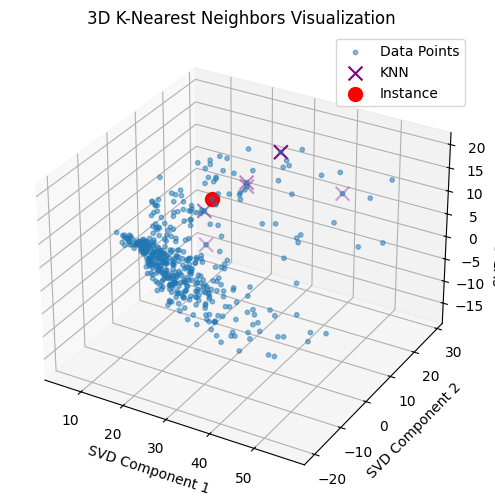

In [161]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD

# Assuming user_movie_table_matrix is your sparse user-movie matrix
X = user_movie_table_matrix

# Perform TruncatedSVD to reduce data to 3 dimensions
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(X)

# Assuming indices are defined (indices of k-nearest neighbors)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection

# Plot all data points (set marker size to 50)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], label='Data Points', alpha=0.5, s=10)

# Plot k-nearest neighbors of a specific point (query_index) with a different marker size (e.g., 100)
ax.scatter(X_reduced[indices, 0], X_reduced[indices, 1], X_reduced[indices, 2], c='purple', label='KNN', marker='x', s=100)

ax.scatter(X_reduced[query_index, 0], X_reduced[query_index, 1], X_reduced[query_index, 2], c='red', label='Instance', marker='o', s=100, alpha=1)

ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')
ax.set_title('3D K-Nearest Neighbors Visualization')
ax.legend()
# # Set specific limits for each axis to zoom in
# lim = 3
# ax.set_xlim(-lim, lim)  # Specify the minimum and maximum values for the x-axis
# ax.set_ylim(-lim, lim)  # Specify the minimum and maximum values for the y-axis
# ax.set_zlim(-lim, lim)  # Specify the minimum and maximum values for the z-axis


plt.show()


# Group Recommendations
## Here we will try different methods for creating recommendations for a group of users.

First we need a way of collecting a random amount of users:

In [162]:
print(user_movie_table.index.name)
random_user = np.random.choice(user_movie_table.shape[1])
print(user_movie_table.iloc[:,random_user])

movieId
movieId
1         0.0
2         2.5
3         0.0
6         0.0
7         0.0
         ... 
109374    0.0
109487    5.0
112852    0.0
116797    0.0
122904    0.0
Name: 497, Length: 450, dtype: float64


In [163]:

#Takes input the pivot table, and the amount of users you wish to take
def get_users(pivot_table, amount):
    
    if(pivot_table.index.name == "movieId"):
        user_position = 1
    else:
        user_position = 0
    
    not_duplicate = False
    while(not_duplicate == False):#This horrific while loop just makes sure we dont pick a user twice, feel free to change/delete
        users = []
        users_names = []
        
        for i in range(0,amount):
            rand_user = pivot_table.iloc[:,np.random.choice(pivot_table.shape[user_position])]
            users.append(rand_user)
            if rand_user.name in users_names:
                break
            else:               
                users_names.append(rand_user.name)
                
            if(len(users_names) == amount): 
                not_duplicate = True
           
    return users
        
users = get_users(user_movie_table_sonya, 5)
print(len(users))


5


We can try making a group prediction by averaging all of the ratings of the users:

In [166]:
def predict_rating_group_avg(users, movieId):#Factors in users who didnnt rate the movie in question
    
    super_user = sum(users)/len(users)

    return super_user.loc[movieId]



predicted_rating = predict_rating_group_avg(users, 1)
print(predicted_rating)



1.4


Weighted methods

In [170]:
def get_count_of_ratings(user):
    count = (user[:] != 0).sum()
    return count

def sort_users_amt(users):
    counts = []
    
    for i in range(0,len(users)):

        counts.append(get_count_of_ratings(users[i]))

    mappings = {}
    
    for i in range(0,len(users)):
        mappings[users[i].name] = counts[i]
        
    sorted_mappings = {key: value for key, value in sorted(mappings.items(), key=lambda item: item[1])}
    
    return sorted_mappings
            

#print(get_count_of_ratings(users[0]))
#print(len(users))

print(sort_users_amt(users))



# def order_users_rating_amt(users):
    

{345: 43, 38: 77, 33: 124, 141: 167, 41: 204}


# Evaluation

In [ ]:
user_movie_table.head(10)
print(user_movie_table.iloc[indices[1],:])
print(len(user_movie_table.iloc[indices[1],:]))
for index in indices:
    print(index)
    
    

userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    0.0
607    0.0
608    4.5
609    0.0
610    4.0
Name: 34048, Length: 606, dtype: float64
606
374
390
366
356
409
416


In [ ]:
# import random


# def predict_rating_average(pivot_table, indices, distances):
#     averages = []
#     for index in indices:
#         averages.append(pivot_table.iloc[index, :].sum()/len(pivot_table.iloc[index, :]))
#     #print(averages)
#     rating = sum(averages)/len(averages)
#     #print(rating)
#     return rating





# errors = []
# for i in range(0,1):
#     rand_id = np.random.choice(user_movie_table.shape[0])
#     #print(rand_id)
    
#     distances_rand, indices_rand = model_knn.kneighbors(user_movie_table.iloc[rand_id,:].values.reshape(1,-1), n_neighbors = k_value+1)
    
    
#     predicted_rating = predict_rating_average(user_movie_table, indices_rand,distances_rand)
#     #print(predicted_rating)
    
#     #print(user_movie_table.iloc[rand_id,:].sum()/len((user_movie_table.iloc[rand_id,:])))
#     actual_rating = user_movie_table.iloc[rand_id,:].sum()/len((user_movie_table.iloc[rand_id,:]))
    
#     error = abs(actual_rating - predicted_rating)
    
#     errors.append(error)

# average_error = sum(errors)/len(errors)
# print(str(average_error))
    


In [ ]:
def predict_user_rating(user_index, movieId, pivot_table, k):
    #Get movie's nearest neighbors
    movieId_index = pivot_table.index.get_loc(movieId)
    
    #print(movieId_index)
    #print(pivot_table.iloc[movieId_index,:])
    p_distances, p_indices  = model_knn.kneighbors(pivot_table.iloc[movieId_index,:].values.reshape(1,-1), n_neighbors = k+1)
    p_indices = p_indices[0][1:]
    
    
    #Get users ratings for those movies
    ratings = []
    
    for index in p_indices:
        #print(pivot_table.iloc[index, user_index])
        ratings.append(pivot_table.iloc[index, user_index-1])
        
        
    #Average their ratings to find their predicted rating for the target movie
    average = sum(ratings)/len(ratings)
    return average




random_movie_id = np.random.choice(user_movie_table.index)
random_user = np.random.choice(user_movie_table.columns)

print("MovieId: ",random_movie_id)
print("Title: ", data_100k_filtered.loc[data_100k_filtered['movieId'] == random_movie_id, 'title'].iloc[0])

print("User: ", random_user)
print("Actual Rating: ", user_movie_table.loc[random_movie_id,random_user])
predicted_rating = predict_user_rating(random_user, random_movie_id, user_movie_table, 10)
print("Predicted Rating: ", predicted_rating)

MovieId:  1393
Title:  Jerry Maguire (1996)
User:  399
Actual Rating:  0.0
Predicted Rating:  0.0


In [ ]:

def create_pivot_table(movies_df, ratings_df):
    data = pd.merge(movies_df,ratings_df)
    return data.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)



def create_knn(pivot_table):
    new_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    pivot_matrix = csr_matrix(pivot_table.values) #Required for knn
    new_knn.fit(pivot_matrix)
    return new_knn

#Takes
def predict_user_rating_rafael(userId, movieId, pivot_table, k, knn_model):
    #Get movie's nearest neighbors
    movieId_index = pivot_table.index.get_loc(movieId)
    
    #print(movieId_index)
    #print(pivot_table.iloc[movieId_index,:])
    p_distances, p_indices  = knn_model.kneighbors(pivot_table.iloc[movieId_index,:].values.reshape(1,-1), n_neighbors = k+1)
    p_indices = p_indices[0][1:]
    
    
    #Get users ratings for those movies
    ratings = []
    
    for index in p_indices:
        #print(pivot_table.iloc[index, userId])
        userId_index = pivot_table.columns.get_loc(userId)
        ratings.append(pivot_table.iloc[index, userId_index])
        
        
    #Average their ratings to find their predicted rating for the target movie
    average = sum(ratings)/len(ratings)
    return average

#Steps:
#Initialize pivot_table -> Initialize Knn -> Use prediction Method

In [ ]:
p_table = create_pivot_table(movie_100k, rating_100k)
p_table.head(10)

knn2 = create_knn(p_table)
print(predict_user_rating_rafael(1,1,p_table,10,knn2))

3.3


In [ ]:


def test_k_accuracy(min_k,max_k, step, iterations, table):
    avg_errors =[]
    for i in range(min_k, max_k, step):
        avg_error = 0
        errors = []
        for j in range(0,iterations):
            random_movie_id = np.random.choice(table.index)
            random_user = np.random.choice(table.columns)

            predicted_rating = predict_user_rating_rafael(random_user,random_movie_id,table,i,test_knn)
            
            actual_rating = user_movie_table.loc[random_movie_id,random_user]
            
            cur_error = abs(predicted_rating-actual_rating)
            errors.append(cur_error)
        avg_error = sum(errors)/len(errors)
        avg_errors.append(avg_error)
        #print("Average error over " + str(iterations) + " iterations for k=" + str(i) + ": " + str(avg_error))
    print("----------------------------------------------")
    print("Average error of all K-average errors: ", str(sum(avg_errors)/len(avg_errors)))
    print("----------------------------------------------")


iter = 200
data_100k_10 = preprocess(data_100k, 'movieId', 10)
data_100k_50 = preprocess(data_100k, 'movieId', 50)
data_100k_100 = preprocess(data_100k, 'movieId', 100)
data_100k_200 = preprocess(data_100k, 'movieId', 200)

# table = data_100k_10.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)

# test_knn = create_knn(table)
# print("________________________________________________")
# print("Excluding no movies:")
# test_k_accuracy(1,19,1,iter, table)






table = data_100k_50.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)
print(data_100k_100)
test_knn = create_knn(table)
print("________________________________________________")
print("Excluding movies with less than 50 ratings:")
test_k_accuracy(1,19,1,iter, table)

table = data_100k_100.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)

test_knn = create_knn(table)
print("________________________________________________")
print("Excluding movies with less than 100 ratings:")
test_k_accuracy(1,19,1,iter, table)

table = data_100k_200.pivot_table(index=["movieId"], columns=["userId"], values="rating").fillna(0)

test_knn = create_knn(table)
print("________________________________________________")
print("Excluding movies with less than 200 ratings:")
test_k_accuracy(1,19,1,iter, table)



       movieId             title  userId  rating
0            1  Toy Story (1995)       1     4.0
1            1  Toy Story (1995)       5     4.0
2            1  Toy Story (1995)       7     4.5
3            1  Toy Story (1995)      15     2.5
4            1  Toy Story (1995)      17     4.5
...        ...               ...     ...     ...
91494    79132  Inception (2010)     596     4.0
91495    79132  Inception (2010)     598     5.0
91496    79132  Inception (2010)     599     3.0
91497    79132  Inception (2010)     601     5.0
91498    79132  Inception (2010)     610     4.0

[20188 rows x 4 columns]
________________________________________________
Excluding movies with less than 50 ratings:


----------------------------------------------
Average error of all K-average errors:  0.6215694498856263
----------------------------------------------
________________________________________________
Excluding movies with less than 100 ratings:
----------------------------------------------
Average error of all K-average errors:  0.8671663900845887
----------------------------------------------
________________________________________________
Excluding movies with less than 200 ratings:
----------------------------------------------
Average error of all K-average errors:  1.4135366522661252
----------------------------------------------
